# Matematický software 

## Cv. 7 - Generátory pseudonáhodných čísel

### 7.1 - Vybrané základní generatárory

V mnoha aplikacích (zejména počítačových simulacích a videohrách) potřebujeme náhodná čísla pro vytvoření náhodného stavu (např.: náhodné souřadnice molekul, náhodný směr výstřelu na videoherní postavu) nebo náhodné události (např.: náhodný videoherní quest). Vytvořit skutečně náhodná čísla je náročný proces, proto v roce 1946 vymysle John von Neumann prvotní metodu pro rychlé získání náhodných číslic, které se nazývají dnes pseudonáhodné. Lze totiž zjistit ze zkoumání minulé sekvence jaké bude následné číslo. Obor generování pseudonáhodných čísel se od té doby rozvíjí a počítačoví vědci přicházejí se stále lepšími metodami (poslední známá zcela nová metoda s reálnou aplikací je například z roku 2020). Na druhou stranu se rozvinula i oblast hlubokého učení, které je schopné rozpoznat následnou sekvenci čísel. Pokud by někdo měl zájem o bakalářskou práci na toto téma, pak mě kontaktuje na emailu pavelberanek91@gmail.com



#### Middle-squared metoda (Neumann, 1946)

"Anyone who considers arithmetical methods of producing random digits is, of course, in a state of sin." (John von Neumann)

První známý generátor pseudonáhodných čísel. Není kvalitní díky krátké periodě opakování náhodných čísel. Metoda řešila problém pomalého čtení náhodných čísel z děrných štítků pro počítač ENIAC.

Princip:
1. Rozmyslíme si, kolika ciferné náhodné číslo chceme (N). Tolika ciferné musí být i prvotní číslo (tzv. semínko)
2. Vem prvotní číslo (semínko) a umocni ho na druhou (např.: 14 umocníme na 196)
3. Doplň nuly tak, aby číslo mělo 2*N číslic, kde N je velikost semínka (196 na 0196)
4. Najdi prostředek umocněného čísla a získej z něj N číslic (z 0196 vezmeme 19)
5. Získané číslo je prvotním číslem do další iterace.

In [20]:
def msm(seminko, pocet_cisel):
    N = len(str(seminko))
    x = [seminko]
    for i in range(pocet_cisel):
        mocnina = str(x[-1]*x[-1]).zfill(2*N)
        prostredek = mocnina[0+N//2:N//2+N]
        x.append(int(prostredek))
        print(i, mocnina, prostredek)
    return x

print(msm(seminko=14, pocet_cisel=10))

0 0196 19
1 0361 36
2 1296 29
3 0841 84
4 7056 05
5 0025 02
6 0004 00
7 0000 00
8 0000 00
9 0000 00
[14, 19, 36, 29, 84, 5, 2, 0, 0, 0, 0]


In [ ]:
print(msm(seminko=1234, pocet_cisel=10))

#### Lineární kongruentní generátory (Lehmer, 1951)

Historicky jeden z nejdůležitějších generátorů pseudonáhodných čísel, jehož způsob návrhu výpočtu je používám v mnoha implementacích novějších generátorů (např.: Park-Miller z C++11 standardní knihovny).

Princip:
1. zvolíme za parametr **M** (modulus) prvočíslo nebo jeho mocninu
2. zvolíme za parametr **C** (inkrement), pro C = 0 se nazývá generátor Lehmerův
3. zvolíme za parametr **A** (násobek) 
4. algoritmus vyžaduje semínko seed, které bude představovat první **x_prev**
5. vypočítáme další náhodné číslo vzorcem: **X_next** = (**A** * **X_prev** + **C**) *mod* **M**

In [ ]:
def lkg(x_predesle, nasobek, inkrement, modulus):
    return (nasobek * x_predesle + inkrement) % modulus

ncisel = 10
seminko = 1
x = seminko
for i in range(ncisel):
    x = lkg(x, nasobek=2, inkrement=0, modulus=9)
    print(i, x)

**ANSI C nastavení LKG**

In [ ]:
def lkg(x_predesle, nasobek, inkrement, modulus):
    return (nasobek * x_predesle + inkrement) % modulus

ncisel = 10
seminko = 1
x = seminko
for i in range(ncisel):
    x = lkg(x, nasobek=1103515245, inkrement=12345, modulus=2**31)
    print(i, x)

#### Opožděný Fibonacciho generátor (Mitchell, Moore, 1958)

Generátor, který využívá Fibonacciho posloupnoust. Místo pevné opožděnosti předposlední a poslední hodnoty pro výpočet následné hodnoty využívá obecné hodnoty opožděnosti. Tento generátor se příliš nepoužívá, ale stojí za zmíňku díky jeho jednoduchosti.

Princip:
1. Zvol parametry j a k (indexy opožděných parametrů Fibonacciho posloupnosti), j < k
2. Vyber operaci *o* pro opožděné parametry (+, -, *, /, atd.)
3. Zvol semínko (hodnoty opožděných parametrů)
4. Vypočti novou hodnotu vzorcem: **s** = (**sj** o **sk**) *mod* **M**
5. Ulož novou hodnotu fo Fibonacciho posloupnosti a opakuj

In [ ]:
from operator import add, sub, mul

def fibgen(n, s, j, k, m, func):
    for i in range(n):
        if 0 <= i <= k:
            s.append(s[i])
        else:
            s.append((func(s[i-j], s[i-k])) % m)
    return s

pocet_cisel = 20
print(fibgen(n=pocet_cisel, s=[8, 6, 7, 5, 3, 0, 9], j=3, k=7, m=10, func=add))

#### Pravidlo 30 (Wolfram, 1983)

Stephen Wolfram je vědec, který se zabývá buněčnými automaty. Typy automatů pojmenoval pomocí decimální reprezentace schémata binárních operací daného automatu. Pravidlo 30 je jedno z nejzajímavějších výpočetních schémat základních automatů, které vytváří automat, obsahující pseudonáhodné sekvence (aperiodické chaotické sekvence bitů).

Princip:
1. Nastav prvotní řádek buněčného automatu na binární 0, prostředek na binární 1
2. Proveď vývoj buněčného automatu do zvolené generace pomocí pravidla 30
3. Vyber prostřední sloupec, přeskoč N bitů (semínko) a získej 8 binárních číslic
4. Vytvoř z M binárních číslic poseudonáhodné číslo

In [ ]:
!python3 -m pip install numpy
!python3 -m pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

#pravidlo 30 bunecneho automatu A xor (B or C)
#000 = 0
#001 = 1 
#010 = 1
#011 = 1
#100 = 1
#101 = 0
#110 = 0
#111 = 0
#-------
#dec = 2 + 4 + 8 + 16 = 30 
def pravidlo30(t):
    return t[0] ^ (t[1] or t[2])


#ziskej trojici bitu vedle sebe (vlevo, vpravo, uprostred) pro vypocet hodnoty pravidlem
def ziskej_trojice(automat):
    return zip(automat, automat[1:], automat[2:])       


#vypocita novy radek automatu pomoci pravidla z postupnych trojic v radku
def novy_stav(automat):
    return [pravidlo30(t) for t in ziskej_trojice([0] + automat + [0])] #nuly kvuli okrajum matice


#vsude bude bitova hodnota 0, uprostred prvniho radku bude jedna bitova 1
def pocatecni_stav_automatu(sirka):
    prvni_radek = [0]*sirka  
    if sirka%2:     #suda sirka, staci najit prostredek a zmenit 0 na 1
        prvni_radek[sirka // 2] = 1
    else:           #licha sirka, musime pridat doprostred bit s hodnotou 1
        prvni_radek.insert(sirka//2, 1)
    return prvni_radek


def vygeneruj_automat(sirka):
    automat = [pocatecni_stav_automatu(sirka)]  #vytvor prvni radek bunecneho automatu (sirka = 2 * počet generací)
    while not automat[-1][0]:                   #opakuj dokavad automat nema pozadovanou sirku (bit 1 na kraji)
        automat.append(novy_stav(automat[-1]))  #pridej novy radek automatu vypocitany z predesleho radku
    return automat


#vykresli bunecny automat na obrazovku
pocet_generaci = 100
automat = vygeneruj_automat(sirka=2*pocet_generaci)
plt.imshow(automat, cmap="gray")

In [ ]:
#získá prostřední sloupec z buněčného automatu
def ziskej_prostredni_sloupec(automat, sirka):
    return [automat[i][sirka//2] for i in range(len(automat))]


#získá náhodná čísla z prostředního sloupce buněčného automatu (8bitové integery)
def ziskej_nahodna_cisla(prostredni_sloupec, seminko):
    nahodna_cisla = []

    #skakej po osmicich ve sloupci a vynech tolik prvnich bitu, jake je seminko
    for i in range(seminko, len(prostredni_sloupec), 8):

        #ziskej 8 bitu, ktere jsou aktualne na rade a preved je do retezce binarnich cislic
        bity = "".join(list(map(str, prostredni_sloupec[i:i+8])))

        #pokud jsme na konci seznamu a nevyzbylo plnych 8 bitu na cislo, tak ukonci
        if len(bity) < 8:
            return nahodna_cisla

        #pripoj do seznamu cisel integer ziskany z retezce binarnich cislic
        nahodna_cisla.append(int(bity, base=2))

    return nahodna_cisla

#nejprve vygenerujeme automat pomoci pravidla 30, na sirce zavisi pocet ziskaych nahodnych cisel
pocet_generaci = 100
automat = vygeneruj_automat(sirka=2*pocet_generaci)

#vysekame prostredni sloupec, preskocime prvnich nekolik bitu podle seminka a ziskame nahodna cisla
seminko = 10
prostredni_sloupec = ziskej_prostredni_sloupec(automat, sirka=2*pocet_generaci)
nahodna_cisla = ziskej_nahodna_cisla(prostredni_sloupec, seminko)
print(nahodna_cisla)

#### Mersenne Twister (Matsumoto, Nishimura, 1998)

Jeden z nejvyužívanějších algoritmů pro generování pseudonáhodných čísel. Jazyk Python ho využívá v modulu random. Oblíbený modul numpy však využívá jiný generátor (PCG64 z roku 2014). Nejvyužívanější verze (nastavení parametrů) se nazývá MT19937. Zmíněný kód je jen pro náhled na složitost moderních algoritmů.

In [ ]:
#koeficienty pro MT19937
(w, n, m, r) = (32, 624, 397, 31)
a = 0x9908B0DF
(u, d) = (11, 0xFFFFFFFF)
(s, b) = (7, 0x9D2C5680)
(t, c) = (15, 0xEFC60000)
l = 18
f = 1812433253
lower_mask = 0x7FFFFFFF
upper_mask = 0x80000000

# seznam pro ukládání stavu generátoru
MT = [0 for i in range(n)]
index = n+1


# generovani naslednich n hodnot serie
def twist():
    for i in range(0, n):
        x = (MT[i] & upper_mask) + (MT[(i+1) % n] & lower_mask)
        xA = x >> 1
        if (x % 2) != 0:
            xA = xA ^ a
        MT[i] = MT[(i + m) % n] ^ xA


# ziskej nove nahodne cislo
def mersenne_twister():
    global index

    #pokud je index vetsi jak parametr n, pak se twistuje a resetuje se index
    if index >= n:
        twist()
        index = 0

    #vypocet noveho nahodneho cisla
    y = MT[index]
    y = y ^ ((y >> u) & d)
    y = y ^ ((y << s) & b)
    y = y ^ ((y << t) & c)
    y = y ^ (y >> l)

    index += 1
    return y & 0xffffffff


# inicializace MT generátoru
def mt_seed(seed):
    MT[0] = seed
    for i in range(1, n):
        temp = f * (MT[i-1] ^ (MT[i-1] >> (w-2))) + i
        MT[i] = temp & 0xffffffff


if __name__ == '__main__':
    
    #spuštění generátoru
    mt_seed(0)
    pocet_cisel = 10
    x = [mersenne_twister() for i in range(pocet_cisel)]
    print(x)

### 7.2 Skutečná náhodná čísla

Metody zmíněné v předešlých cvičeních generují pouze pseudonáhodná čísla. Čísla nemají zcela náhodnou distribuci a lze i pro slabší metody odhadnout následné sekvence (například neuronovou sítí). To může být problém pro některé aplikace jako je například gambling nebo armádní šifrovací aplikace. Z tohoto důvodu existuje několik zařízení nebo webových služeb, které poskytují skutečně náhodná čísla.

Generátory skutečně náhodných čísel využívají nějaký fyzický nebo fyzikální fenomén. Příklad fyzického fenoménu je generování čísla ze sekvence pohybu počítačovou myší nebo úhozů do klávesnice či prodlevě mezi úhozy. Problém s těmito fyzickými jevy vězí v tom, že člověk může využívat podobný vzor pohybů a úhozů a také dochází ke komunikaci dat s operačním systémem pomocí bufferů, které mohou náhodnout vyrušit. Fyzikální fenomény jsou většinou lepší i když finančně náročnější metodou. Nejčastěji využívají náhodnosti radioaktivního rozpadu nuklidů nebo atmosférického šumu (elektromagnetické vlnění v daném prostoru a čase), který lze získat citlivou anténou. Slabší generátory využívají akustického tlaku (šum z hluku) v místnosti, které však mají problém s určitými prediktivními jevy jako hluk z otáček větráku. Nejlevnější a nejspolehlivější metoda bývá využití externích webových služeb přes jejich rozhraní REST. Pro více informací si přečtěte následující článek: https://www.random.org/randomness/. Pokud by někdo měl zájem o bakalářskou práci na toto téma, pak mě kontaktuje na emailu pavelberanek91@gmail.com

Jednou z takovou služeb je random.org. Data pro vygenerování náhodných číslic pochází z atmosférického šumu. Pro využití generátoru ze stránky random.org potřebujete získat API klíč, který uvádíte v požadavku ve formátu JSON pomocí metody POST z HTTP protokolu. Klíč si můžete vygenerovat po registrace na stránce: https://accounts.random.org/create. Při volbě developer licence je registrace zcela zdarma, avšak máte omezen denní limit vygenerovaných čísel na 1000.

In [ ]:
!python3 -m pip install requests

In [102]:
import requests
import json

def true_random(klic, metoda, pocet_cisel, min_cislo, max_cislo):

    pozadavek = {
        "jsonrpc": "2.0",
        "method": "generateIntegers",
        "params": {
            "apiKey": klic,
            "n": pocet_cisel,
            "min": min_cislo,
            "max": max_cislo,
            "replacement": True
        },
        'id':1
    }
    pozadavek = json.dumps(pozadavek)

    hlavicka = {
        'Content-type': 'application/json',
        'Content-Length': '200', 
        'Accept': 'application/json'
    }

    odpoved = requests.post(
        url='https://api.random.org/json-rpc/2/invoke',
        data=pozadavek,
        headers=hlavicka
    )

    return odpoved.text["result"]["random"]["data"]


klic = "sem napise svuj API klic"
x = true_random(klic=klic, metoda="generateIntegers", pocet_cisel=20, min_cislo=1, max_cislo=9)
print(x)


{"jsonrpc":"2.0","result":{"random":{"data":[6,1,5,4,2,3],"completionTime":"2022-04-21 03:59:11Z"},"bitsUsed":16,"bitsLeft":249984,"requestsLeft":999,"advisoryDelay":950},"id":1}


### 7.3 Modul Random

Základní modul pythonu pro generování náhodných čísel se nazývá random a využívá generátor Mersenne Twister. Tento modul obsahuje spousty užitečných metod nad čísly z Mersenne Twisteru.

#### Nastavení semínka

Pokud nezvolíme semínko, pak je semínko voleno náhodně při každém spuštění. Je tedy vhodné pro opakovatelnost pokusů a debugování programu nastavit pevné semínko.

In [104]:
from random import randint, seed

#po každém nastavení semínka se vyresetuje generátor
seed(1)
x1 = [randint(1,9) for i in range(10)]

seed(1)
x2 = [randint(1,9) for i in range(10)]
print(x1, x2) #tyto sekvence budou úplně stejné

#začneme sice od znova, ale tato sekvence bude již jiná díky jinému semínku
seed(2)
x2 = [randint(1,9) for i in range(10)]
print(x1, x2) 

[3, 2, 5, 2, 8, 8, 8, 7, 4, 2] [3, 2, 5, 2, 8, 8, 8, 7, 4, 2]
[3, 2, 5, 2, 8, 8, 8, 7, 4, 2] [1, 2, 2, 6, 3, 5, 5, 4, 1, 3]


#### Generování desetinných čísel

Základní funkce generátoru random je generování desetinných čísel v rozmezí 0 až 1. Pokud potřebujeme jiný rozsah, tak existuje vzorec, který např. Prof. Hrach nazývá transformace náhodné veličiny. Tento příkaz využívá rovnoměrné (uniformní) rozdělení.

In [112]:
from random import random

#základní funkce
x = [random() for i in range(5)]
print(x)

#transformace náhodné veličiny
min_cislo = -2
max_cislo = 8
x = [min_cislo + random()*(max_cislo - min_cislo) for i in range(5)]
print(x)


[0.7842798517674207, 0.3414589220728672, 0.00842182269434344, 0.8150594844773614, 0.9970685969649458]
[-0.9384307668537732, 3.744149584539974, -1.5108987187519878, 3.9170031716388847, 4.824776670000788]


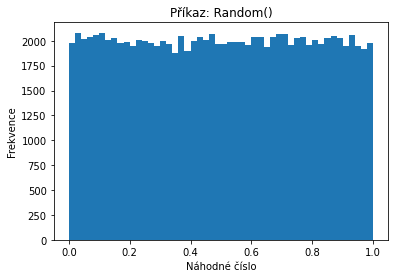

In [156]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [random() for i in range(100000)]
plt.hist(x, bins=50)
plt.gca().set(title='Příkaz: Random()', ylabel='Frekvence', xlabel="Náhodné číslo");

#### Generování celých čísel

Pokud chceme generovat náhodná celá čísla, tak existuje velice snadno použitelná metoda randint s inkluzivními hranicemi.

In [114]:
from random import randint

min_cislo = -2
max_cislo = 4

x = [randint(min_cislo, max_cislo) for i in range(10)]
print(x)

[0, -1, 4, -1, -2, 1, 3, 4, -2, -2]


#### Náhodné číslo z Gaussovského rozdělení

Gaussovské rozdělení je rozdělení, kde převážná část hodnot se vyskytuje kolem jedné centrální hodnoty (střední hodnota) a odchyluje se od ní s nějakým rozptylem hodnot. Tato data jsou typická pro sociologické a fyziologické jevy.

In [115]:
from random import gauss

stredni_hodnota = 0
rozptyl = 1

x = [gauss(mu=stredni_hodnota, sigma=rozptyl) for i in range(5)]
print(x)

[-0.3984472588368271, 0.4673720072295877, -0.1940613157980731, -0.3680008937497744, 0.21741783385422764]


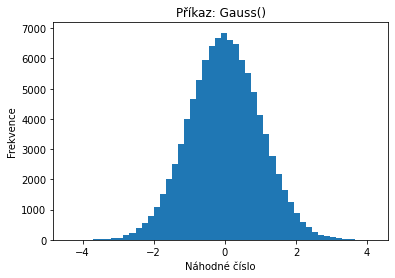

In [157]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [gauss(mu=0, sigma=1) for i in range(100000)]
plt.hist(x, bins=50)
plt.gca().set(title='Příkaz: Gauss()', ylabel='Frekvence', xlabel="Náhodné číslo");

#### Náhodný výběr prvků z kolekce

Typický způsob výběru prvků z nějaké kolekce v jazykách typu C je vygenerování náhodného celého čísla, reprezentující index do kolekce. Python tento způsob urychluje přímým náhodným výběrem z kolekce.

In [120]:
from random import choice

studenti = ["Feránek", "Rýkorová", "Žgvor", "Nuba", "Kosel", "Laškov", "Varilla", "Hubera"]
x = choice(studenti)

print(f"K tabuli půjde: {x}")

K tabuli půjde: Rýkorová


#### Náhodný výběr podmnožiny z kolekce

V mnoha situacích potřebujete vybrat více náhodných prvků z kolekce bez opakování. Naivní způsob by byl udělat si kopii kolekce, vybrat náhodný element a element z kolekce odebrat (destruktivní způsob = mění stav programu). Existuje i nedestruktivní výběr podmnožiny z kolekce.

In [126]:
from random import sample

studenti = ["Feránek", "Rýkorová", "Žgvor", "Nuba", "Kosel", "Laškov", "Varilla", "Hubera"]
pocet_dobrovolniku = 3
x = sample(studenti, pocet_dobrovolniku)

print(f"Dobrovolnici: {x}")

Dobrovolnici: ['Rýkorová', 'Žgvor', 'Varilla']


#### Zamíchání kolekce

V mnoha karetních hrách nebo v čase/vlastnosti seřazených datech je zapotřebí data rozmíchat. Python umožňuje rychlé rozmíchání kolekce.

In [128]:
from random import shuffle 

vysky_studentu = [150, 155, 155, 157, 165, 168, 174, 174, 178, 180, 184, 187, 191, 191]
shuffle(vysky_studentu)
print(vysky_studentu)

[178, 155, 187, 157, 165, 180, 174, 174, 150, 191, 168, 191, 184, 155]


### 7.4 Numpy.random

Knihovna numpy je základem pro knihovny pro strojové učení a analýzu dat jako třeba scikit-learn, tensorflow, pytorch a další. Numpy používá odlišný generátor než modul random a má jemně odlišné API pro volání funkcí. Hlavní rozdíl v používání spočívá v tom, že numpy je modul pro lineární algebru a pracuje tedy s tenzory n-tého řádu. Dokáže vygenerovat naráz více čísel do vektoru, matice, tenzoru bez používání generátorové notace seznamu (comprehension).



#### Nastavení semínka

In [129]:
from numpy.random import seed, rand

seed(1)

nahodny_vektor = rand(5)
print(nahodny_vektor)

[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01
 1.46755891e-01]


#### Generování tenzorů

In [130]:
nahodna_matice = rand(3, 2)
print(nahodna_matice)

[[0.09233859 0.18626021]
 [0.34556073 0.39676747]
 [0.53881673 0.41919451]]


In [134]:
nahodny_tenzor = rand(2, 2, 3)
print(nahodny_tenzor)

[[[0.69232262 0.87638915 0.89460666]
  [0.08504421 0.03905478 0.16983042]]

 [[0.8781425  0.09834683 0.42110763]
  [0.95788953 0.53316528 0.69187711]]]


#### Celá čísla

In [139]:
from numpy.random import randint

#pozor! hodnota horní hranice (tzv. high) je exkluzivní!
nahodny_vektor = randint(1, 9, 20)
print(nahodny_vektor)

[4 3 8 3 3 3 1 4 1 7 4 3 5 2 6 5 3 1 1 2]


In [135]:
nahodny_tenzor = randint(low=1, high=9, size=(2, 4, 3))
print(nahodny_tenzor)

[[[2 4 5]
  [3 5 1]
  [6 4 2]
  [3 8 1]]

 [[5 2 8]
  [3 8 8]
  [3 2 1]
  [7 2 4]]]


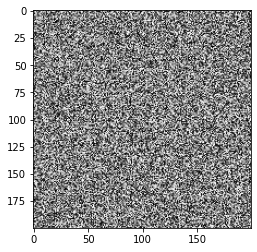

In [138]:
from numpy.random import randint
import matplotlib.pyplot as plt

cernobily_obrazek = randint(low=0, high=256, size=(200, 200))
plt.imshow(cernobily_obrazek, cmap="gray")

#### Gaussovské rozdělení

In [142]:
from numpy.random import randn

#mu = 0, sigma = 1
nahodne_gauss_hodnoty = randn(10)

print(nahodne_gauss_hodnoty)

[ 0.25502607 -0.33288118  0.56623145  0.37238649  1.52246149  0.80809112
 -0.74438535  0.81303158  1.32765707  1.62734082]


In [143]:
#gaussovské hodnoty si musíme ručně škálovat transformací náhodné veličiny
mu = 100
sigma = 25
skalovane_gauss_hodnoty = mu + randn(10)*sigma
print(skalovane_gauss_hodnoty)

[118.26473035  93.56627654 126.97397513  67.10145381 113.75976396
 130.5839976   57.88533936  96.8629192  133.93995586 137.25515993]


#### Shuffle

In [145]:
from numpy.random import shuffle
from numpy import matrix

#shuffle v matici jen prohodi radky
matice = matrix("1 2 3; 4 5 6; 7 8 9")
shuffle(matice)

print(matice)

[[1 2 3]
 [7 8 9]
 [4 5 6]]


#### Užitečná rozdělení

V průběhu studia narazíte v různých předmětech (simulace systémů, kvantitativní management, optimalizace, dependabilita) na spousty problémů, které vyžadují náhodné veličiny. Tyto náhodné veličiny nemusí nabývat nutně hodnot z jednoho intervalu stejnoměrně. Charakter hodnot náhodné veličiny popisuje tzv. distribuce. Numpy.random umožňuje generovat náhodná čísla z různých rozdělení. Zde jsem pro vás připravil některá známá užitečná rozdělení pro různé oblasti od společenských věd po fyziku.

**Binomické (Bernoulliho) rozdělení**

Slouží pro modelování toho, kolikrát pozorujeme určitý náhodný jev z celkového počtu pozorování, pokud známe pravděpodobnost, se kterou nastává.

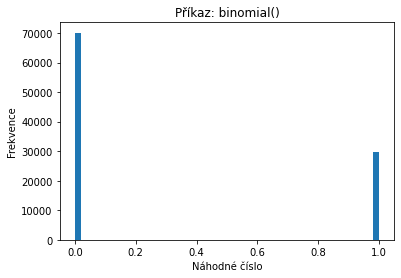

In [2]:
from numpy.random import binomial
import matplotlib.pyplot as plt
%matplotlib inline

#Na upravene minci je sance, ze padne hlava (vysledek=1) 30%
x = [binomial(n=1, p=0.3) for i in range(100000)]

#Graf udava, kolikrat pri opakovani 100000 hodu padla hlava (1) a kolikrat orel (0)
plt.hist(x, bins=50)
plt.gca().set(title='Příkaz: binomial()', ylabel='Frekvence', xlabel="Náhodné číslo");

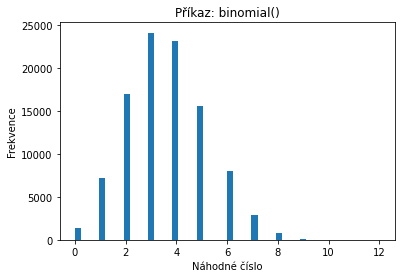

In [305]:
from numpy.random import binomial

#Student má potíže se vstáváním. Pravděpodobnost, že zaspí, je 0,3. V semestru je 12 přednášek. 
x = binomial(n=12, p=0.3, size=100000)

#Graf udava, kolikrat zaspal dany pocet prednasek pri opakovani 100000 experimentu
plt.hist(x, bins=50)
plt.gca().set(title='Příkaz: binomial()', ylabel='Frekvence', xlabel="Náhodné číslo");

**Geometrické rozdělení**

Modeluje počet neúspěchů před prvním úspěchem v řadě Bernoulliovských pokusů. Příklady takových jevů jsou: "Kolikrát musí člověk hodit kostkou (neúspěšně) než padně číslo 6 (úspěch)?", "Kolikrát musím vsadit tiket se stejnými čísly ve sportce, než vyhraji?".

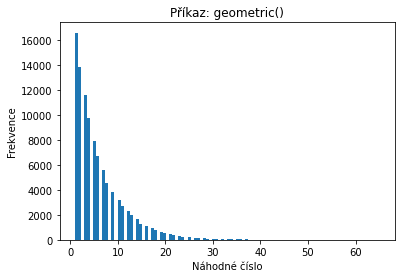

In [304]:
from numpy.random import geometric

#Kolikrat musí člověk hodit 6-stěnnou kostkou než padně číslo 6? Opakujeme 100000
x = geometric(p=1/6, size=100000)
plt.hist(x, bins=100)
plt.gca().set(title='Příkaz: geometric()', ylabel='Frekvence', xlabel="Náhodné číslo");

**Beta rozdělení**

Beta rozdělení je obecné rozdělení, ze kterého vychází moho dalších dílčích dělení. Představuje pravděpodobnostní rozdělení pravděpodobností. Lze ho použít pro modelování jevů jako: jaká je pravděpodobnost, že uživatel klikne na reklamu?, jaká je pravděpodobnost, že ANO vyhraje příští volby? jaká je pravděpodobnost, že člověk s rakovinou přežije více jak 5 let?

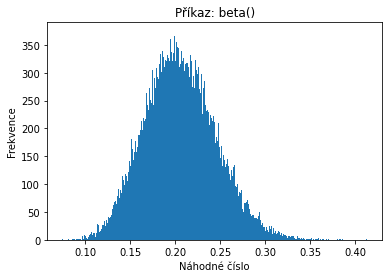

In [17]:
from numpy.random import beta

#a = alfa parametr, počet úspěchů + 1
#b = beta parametr, počet neúspěchů + 1
#příklad: na kolik (x) procent je pravděpodobné, že se mnou půjde dívka z Tinderu na rande, když
#  80  z celkového počtu 100 oslovených dívek mě odmítlo a 20  přijalo?
x = beta(a=21,b=81, size=100000)
plt.hist(x, bins=1000)
plt.gca().set(title='Příkaz: beta()', ylabel='Frekvence', xlabel="Náhodné číslo");

**Gama rozdělení**

Rozdělení, které se nejčastěji používá v ekonometrii a jejích podoborech (optimalizace, kvantitativní management, operační výzkum) pro modelování čekacích dob ve frontách. Lze také použít pro modelování demografických jevů, kde se používá pro dobu života člověka. Při studiu na naší katedře se s ním také můžete setkat při studiu oboru dependability informačních systémů, kde se používá při modelování bezporuchového provozu.

Velice populární sou jeho specifičtější verze a to: Exponenciální rozdělení (doba života do poruchy trvale nenamáhané komponenty), Erlangovo rozdělení (doba života do n-té poruchy komponenty) a Chí-kvadrát rozdělení (testování hypotéz), se kterými se během studia setkáte. I ty všechny naleznete v numpy.rand.

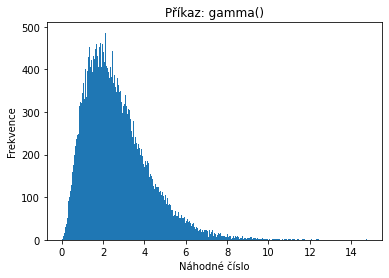

In [301]:
from numpy.random import gamma

#Jak dlouho potrvá než se rozpadnou tři izotopy Thoria , pokud je poločas rozpadu Thoria 0.9 sekundy
#shape = počet událostí, který mě zajímá
#scale = průměrná doba mezi událostmi 
x = gamma(shape=3, scale=0.9, size=100000)

plt.hist(x, bins=1000)
plt.gca().set(title='Příkaz: gamma()', ylabel='Frekvence', xlabel="Náhodné číslo");

**Exponenciální rozdělení**

Jedná se o gama rozdělení s parametrem shape=1 (můžete si vyzkoušet).

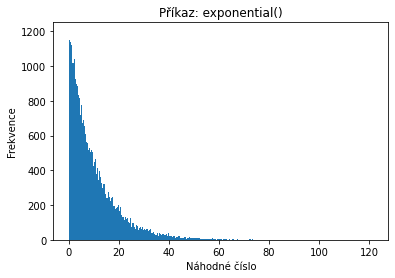

In [308]:
from numpy.random import exponential

#Počítačový disk vydrží průměrně 5 let než selže. Jaká je pravděpodobnost, že vydrží N let?
x = exponential(scale=10, size=100000)
plt.hist(x, bins=1000)
plt.gca().set(title='Příkaz: exponential()', ylabel='Frekvence', xlabel="Náhodné číslo");

**Mocniné rozdělení**

Pro případ obecného mocniného rozdělení lze použít funkci power, kde lze oproti exponenciálnímu volit i základ (u exponenciálního je základ Eulerovo číslo e).

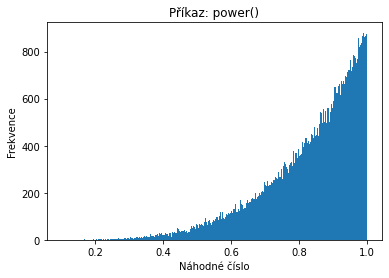

In [9]:
from numpy.random import power

x = power(5, size=100000)
plt.hist(x, bins=500)
plt.gca().set(title='Příkaz: power()', ylabel='Frekvence', xlabel="Náhodné číslo");

**Poissonovo rozdělení**

Poissonovo rozdělení úzce souvisí s gama rozdělením. Gama rozdělení ukazuje časový interval, po který nedojde k nějaké události (nebo počtu událostí). Poissonovo rozdělení naopak ukazuje kolikrát dojde k události za daný časový interval. Události musí být náhodné a vzájemně nezávislé. Jedná se o limitní případ binomického rozdělení.

Jevy, které se řídí tímto rozdělením jsou například: počet příchozích telefonátů na zákaznické licence, počet fotonů, které dorazí do teleskopu v astronomii, počet ztrát za měsíc v pojišťování, počet rozpadů nuklidů v radiofyzice, atd.

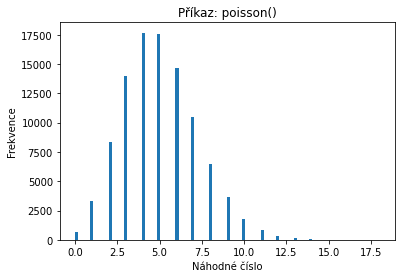

In [344]:
from numpy.random import poisson

#Podomní prodejce prodá v průměru 5 hrnců s tajemného samorozpouštěcího materiálu za den. 
# Jaká je pravděpodobnost, že počet prodaných hrnců za den bude N?
x = poisson(lam=5, size=100000)
plt.hist(x, bins=100)
plt.gca().set(title='Příkaz: poisson()', ylabel='Frekvence', xlabel="Náhodné číslo");

**Normální (Gaussovské) rozdělení**

Jedná se nejdůležitější rozdělení v mnoha oblastech vědy díky limitnímu centrálnímu teorému. Ten říká (laicky), že náhodné veličiny konvergují při akumulaci k jedné střední hodnotě od které se odchylují rozptylem. Ačkoliv je výška vybrané osoby na ulici náhodná veličina, pokud provedeme spousty měření, bude výška distribuce výšky sledovat normální rozdělení, tedy rozdělení se zvonečkovým (bell) průběhem. Tento teorém je tak silný v našem světě, že pokud budete chodit po UJEPu a ptát se studentů na číslo v rozmezí od 1 do 100, tak volba čísla bude při dostatečném počtu vzorku odpovídat normálnímu rozdělení.


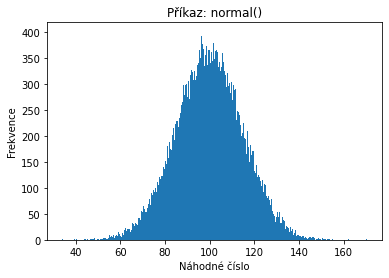

In [319]:
from numpy.random import normal

#modelování IQ, střední hodnota 100 a rozptyl 15
x = normal(loc=100, scale=15, size=100000)
plt.hist(x, bins=1000)
plt.gca().set(title='Příkaz: normal()', ylabel='Frekvence', xlabel="Náhodné číslo");

**Laplaceovo rozdělení**

Jedná se o další symetrické rozdělení kolem střední hodnoty s rozptylem (stejně jako normální rozdělení), který vytváří dvojitou exponenciální funkci kolem střední hodnoty (oproti normálnímu rozdělení má tedy čistě konvexní tvar). Využívá se zejména při zpracování signálů z biologických dat, hodnocení rizik ve finančním managementu, modelování rizika záplav v hydrologii nebo zemětřesení, atd.

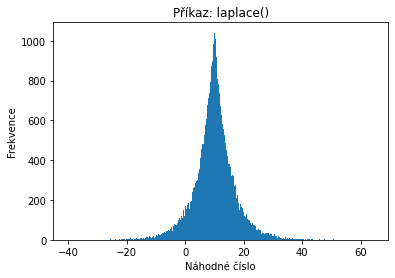

In [318]:
from numpy.random import laplace

#loc = stredni hodnota
#scale = rozptyl
x = laplace(loc=10, scale=5, size=100000)
plt.hist(x, bins=1000)
plt.gca().set(title='Příkaz: laplace()', ylabel='Frekvence', xlabel="Náhodné číslo");

**Logaritmicko-normální rozdělení**

Spousty lidských (biologických, sociologických, psychologických) vlastností a dějů se řídí normálním rozdělením. Existují procesy tohoto charakteru, které se sčítají. Ty se řídí typicky logaritmicko-normálním rozdělením. Příkladem může být: délka komentářů na diskuzních fóru, čas strávený prohlížením webové stránky, délka šachové partie, geometrické vlastnosti tkání, krevní tlak, velikost růstu vlasů/nehtů v určitém směru, příjem lidí, počet citací vědeckého článku, velikost částic po nárazu drtidlem na těleso, atd.

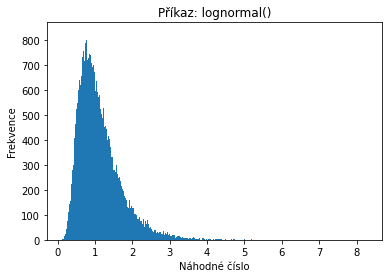

In [337]:
from numpy.random import lognormal

x = lognormal(mean=0, sigma=0.5, size=100000)
plt.hist(x, bins=1000)
plt.gca().set(title='Příkaz: lognormal()', ylabel='Frekvence', xlabel="Náhodné číslo");

**Rovnoměrné (obdélníkové) rozdělení**

Jedná se o nejvýužívanější rozdělení vůbec. Každá hodnota by měla být při vzorkování (vybírání čísel) stejným počtem zastoupená v určitém časovém intervalu. Jedná se o příklad rozdělení, které využívají funkce jako rand(), randint(), atd. 

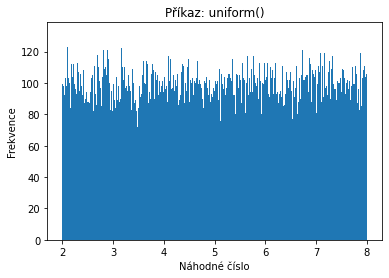

In [326]:
from numpy.random import uniform

#left = nejmenší hodnota
#right = největší hodnota
x = uniform(low=2, high=8, size=100000)
plt.hist(x, bins=1000)
plt.gca().set(title='Příkaz: uniform()', ylabel='Frekvence', xlabel="Náhodné číslo");

**Trojúhelníkové (lack-of-knowledge) rozdělení**

Trojúhelníkové rozdělení se typicky používá v demografických a sociologických studiích, kde máme omezená/nekvalitní data, ale tušíme, jaká hodnota by měla být nejčastější (mode), nejmenší možná a největší možná. Několik dalších aplikací jsou například simulace podnikového rozhodování, kde má manažer empirickou znalost nejčastější hodnoty a dostává tak pro skutečný podnik lepší výsledky než s využitím rovnoměrného rozdělení, nebo při inženýrství zvuku, kde zvukové signály mohou mít tyto charakteristiky. Existuje i vyšší abstrakce tohoto rozdělení jako například lichoběžníkové.

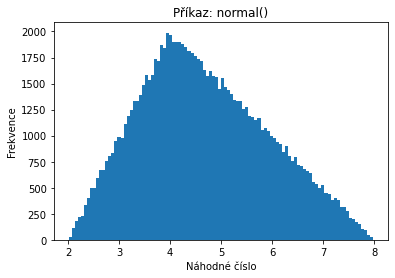

In [325]:
from numpy.random import triangular

#mode = nejčastější hodnota
x = triangular(left=2, mode=4, right=8, size=100000)
plt.hist(x, bins=100)
plt.gca().set(title='Příkaz: triangular()', ylabel='Frekvence', xlabel="Náhodné číslo");

### 7.5 - Testování kvality generátorů

Generátory náhodných čísel tvoří pouze pseudonáhodná čísla, která se opakují po určité periodě a mohou v počítačových simulacích, které mají věrně reprezenzovat skutečné přírodní procesy, zanést určité artefakty. Z toho důvodu je dobré provést test kvality vybraného generátoru pseudonáhodných čísel.

#### Standardizované (Z) skóre

Pravděpodobně nejjednodušší způsob testování kvality generátoru. Pomocí Z-skóre se počítá korelace (souvislost) vzorků.

#### Spektrální test

**Middle-squared metoda**

In [27]:
def msm(x):
    N = len(str(x))
    mocnina = str(x*x).zfill(2*N)
    prostredek = mocnina[0+N//2:N//2+N]
    x = int(prostredek)
    return x

seminko = 14
x = seminko
rand_nums = []
for i in range(10000):
    x = msm(x)
    rand_nums.append(x)
print(rand_nums)

[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,

#### Diehard testy

Diehard je sada testů od George Marsaglia pro testování kvality náhodných generátorů. Bohužel aktuálně není k dispozici tato sada testů v žádném repozitáři. Existuje pouze jeden projekt na githubu o kterém vim a je nekompletní. Z tohoto důvodu jsem se pokusil v této kapitolce naprogramovat 5 vybraných testů a to:

1. Minimum distance test
2. Parking lot test
3. The squeeze test 
4. Birthday spacings 
5. Count the 1s

Pokud by někdo měl zájem o bakalářskou práci na toto téma, pak mě kontaktuje na emailu pavelberanek91@gmail.com

**Minimum distance test**

**Parking lot test**

**The squeeze test**

**Birthday spacings**

**Count the 1s**

### 7.6 Kryptograficky bezpečné generátory

#### Modul os.urandom

Pro potřeby generování kryptograficky důležitých řetězců (hesla, hash) se využívá v Unixových operačních systémech soubor /dev/urandom, do kterého OS ukládá fyzikální informace ze šumu počítače pomocí ovladačů hardwaru v daném čase. V operačních systémech windows se využívá systémová funkce CryptGenRandom(), která generuje náhodné veličiny na základě fyzických údajů nasbíraných za určitý interval (proces ID, stav operační paměti, atd.).

In [368]:
from os import urandom

x = urandom(6).hex()
print(x)

2801d4b09605


#### Modul secrets

V pythonu existuje modul secrets, který obsahuje některé užitečné funkce pro kryptograficky bezpečné generování. Jedná se o preferovaný způsob generování náhodných znaků. Modul představuje obal kolem os.urandom().

In [371]:
import secrets

print(secrets.token_hex(16))

#URL safe používají zkracovače webových stránek jako tinyurl nebo bit.ly
print(secrets.token_urlsafe(16))

d269652e1ac81a3e4ef251446f700363
ori-jvSc3nytegrOm7SUHg


In [373]:
from secrets import token_urlsafe

databaze_zkracenych_url = {}

def zkrat_url(url: str, nbytu: int=5) -> str:
    zkraceny_odkaz = token_urlsafe(nbytes=nbytu)                #vygeneruj zkracenou url o zadane velikosti bytu
    if zkraceny_odkaz in databaze_zkracenych_url:               #pokud odkaz jiz existuje v databazi
        return zkrat_url(url, nbytu=nbytu)                      #tak spust generovani od znovu pro dalsi pokus
    else:
        databaze_zkracenych_url.update({zkraceny_odkaz: url})   #pokud je zkracena URL unikatni, uloz ji do DB
        return f'tinyujep.ly/{zkraceny_odkaz}'                  #vrat zkraceny odkaz

urls = (
    "www.ujep.cz",
    "www.prf.ujep.cz",
    "www.ki.ujep.cz"
)

for url in urls:
    print(url, zkrat_url(url))

www.ujep.cz tinyujep.ly/PUqofNQ
www.prf.ujep.cz tinyujep.ly/B2VtPgs
www.ki.ujep.cz tinyujep.ly/XLTLp1U


#### Modul uuid

Zkratka UUID znamená Universally Unique Identifier. Jedná se o 128 bitovou sekvenci (řetězec délky 32), která garantuje unikátnost v prostoru a čase. Modul představuje obal kolem os.urandom().

In [376]:
import uuid

x = uuid.uuid4() #existuje 2**128 možných kombinací (340 undecilionů) znaků, takže by nemělo dojít ke kolizi
print(x)
print(x.int)
print(x.hex)

1483f1d4-4c6a-4fc5-bf7b-058d99034cab
27269655684900696552085110471063194795
1483f1d44c6a4fc5bf7b058d99034cab
